# Benchmark of Linguistic Minimal Pairs (BLiMP) Analysis


## SETUP

### Installation of required libraries

In [2]:
!pip install datasets seaborn matplotlib numpy nltk scikit-learn --quiet

### Import of libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import nltk
from collections import Counter
from tqdm.notebook import tqdm

## PREPERATION

ⓘ BLiMP consists of 67 paradigms with 1.000 minimal pairs each.

In [2]:
# A list of paradigms in the BLiMP dataset
paradigms = ['adjunct_island', 'anaphor_gender_agreement', 'anaphor_number_agreement', 'animate_subject_passive', 'animate_subject_trans', 'causative', 'complex_NP_island', 'coordinate_structure_constraint_complex_left_branch', 'coordinate_structure_constraint_object_extraction', 'determiner_noun_agreement_1', 'determiner_noun_agreement_2', 'determiner_noun_agreement_irregular_1', 'determiner_noun_agreement_irregular_2', 'determiner_noun_agreement_with_adj_2', 'determiner_noun_agreement_with_adj_irregular_1', 'determiner_noun_agreement_with_adj_irregular_2', 'determiner_noun_agreement_with_adjective_1', 'distractor_agreement_relational_noun', 'distractor_agreement_relative_clause', 'drop_argument', 'ellipsis_n_bar_1', 'ellipsis_n_bar_2', 'existential_there_object_raising', 'existential_there_quantifiers_1', 'existential_there_quantifiers_2', 'existential_there_subject_raising', 'expletive_it_object_raising', 'inchoative', 'intransitive', 'irregular_past_participle_adjectives', 'irregular_past_participle_verbs', 'irregular_plural_subject_verb_agreement_1', 'irregular_plural_subject_verb_agreement_2', 'left_branch_island_echo_question', 'left_branch_island_simple_question', 'matrix_question_npi_licensor_present', 'npi_present_1', 'npi_present_2', 'only_npi_licensor_present', 'only_npi_scope', 'passive_1', 'passive_2', 'principle_A_c_command', 'principle_A_case_1', 'principle_A_case_2', 'principle_A_domain_1', 'principle_A_domain_2', 'principle_A_domain_3', 'principle_A_reconstruction', 'regular_plural_subject_verb_agreement_1', 'regular_plural_subject_verb_agreement_2', 'sentential_negation_npi_licensor_present', 'sentential_negation_npi_scope', 'sentential_subject_island', 'superlative_quantifiers_1', 'superlative_quantifiers_2', 'tough_vs_raising_1', 'tough_vs_raising_2', 'transitive', 'wh_island', 'wh_questions_object_gap', 'wh_questions_subject_gap', 'wh_questions_subject_gap_long_distance', 'wh_vs_that_no_gap', 'wh_vs_that_no_gap_long_distance', 'wh_vs_that_with_gap', 'wh_vs_that_with_gap_long_distance']

# A dictionary with abbveriations of lingustic terms for better display
phenomena = {
        "anaphor_agreement": "ANA AGR",
        "argument_structure": "ARG STR",
        "binding": "BINDING",
        "control_raising": "CTRL RAIS",
        "determiner_noun_agreement": "D-N AGR",
        "ellipsis": "ELLIPSIS",
        "filler_gap_dependency": "FILLER. GAP",
        "irregular_forms": "IRREGULAR",
        "island_effects": "ISLAND",
        "npi_licensing": "NPI",
        "quantifiers": "QUANTIFIERS",
        "subject_verb_agreement": "S-V AGR"
}

In [3]:
# Create a dataframe to hold data for each paradigm
blimp_df = pd.DataFrame()

# Iterate over each paradigm and filter the dataset
for paradigm in paradigms:
    # Load the dataset for the current paradigm
    subset = load_dataset('nyu-mll/BLiMP', name=paradigm)
    
    # Convert the dataset to a dataframe and add the paradigm column
    subset_df = pd.DataFrame(subset['train'])
    subset_df.rename(columns={'UID': 'paradigm'}, inplace=True)
    # Add the phenomenon column using the phenomena dictionary
    subset_df['phenomenon'] = subset_df['linguistics_term'].map(phenomena).fillna('EMPTY')

    # Print loading status
    print(f"\rLoading {paradigm}: {((paradigms.index(paradigm) + 1) / len(paradigms)) * 100:.2f}%{' ' * 30}", end='')
    
    # Append the subset dataframe to the main dataframe
    blimp_df = pd.concat([blimp_df, subset_df], ignore_index=True)

# Display the combined dataframe
blimp_df.head()

Loading wh_vs_that_with_gap_long_distance: 100.00%                                               

,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon
0,Who should Derek hug after shocking Richard?,Who should Derek hug Richard after shocking?,syntax,island_effects,adjunct_island,True,False,False,True,0,ISLAND
1,What had Theresa walked through while talking ...,What had Theresa walked through that high scho...,syntax,island_effects,adjunct_island,True,False,False,True,1,ISLAND
2,Who will Katherine discover without hiring Erin?,Who will Katherine discover Erin without hiring?,syntax,island_effects,adjunct_island,True,False,False,True,2,ISLAND
3,Who has Colleen aggravated before kissing Judy?,Who has Colleen aggravated Judy before kissing?,syntax,island_effects,adjunct_island,True,False,False,True,3,ISLAND
4,What could a lot of cats break while finding a...,What could a lot of cats break all convertible...,syntax,island_effects,adjunct_island,True,False,False,True,4,ISLAND


## STATISTICS

In [4]:
# Display basic statistics of specific columns in blimp_df
blimp_df.describe(include='all').loc[['count', 'unique', 'freq']]

,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon
count,67000,67000,67000,67000,67000,67000,67000,67000,67000,67000.0,67000
unique,66984,66968,5,13,67,1,2,2,2,NaN,13
freq,2,2,26000,8000,1000,67000,47000,47000,47000,NaN,8000


**Findings:**
- 5 fields, when there should be 4
- 13 lingustic terms when there should be 12
- correct ammount of paradigms
- apparently duplicate sentences

### Analysing Fields

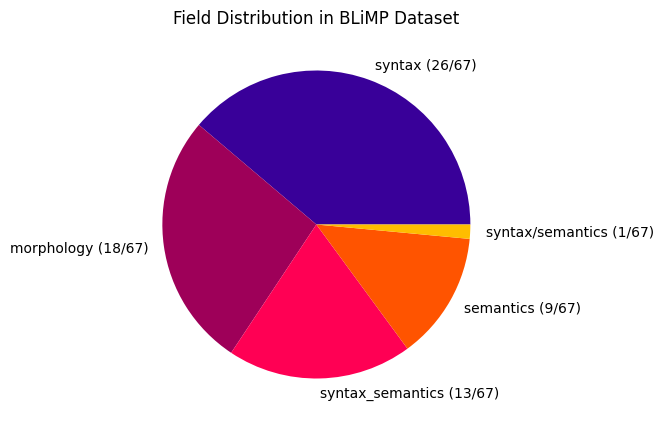

In [5]:
# Calculate the field distribution
field_distribution = blimp_df['field'].value_counts()

# Plot the field distribution as a pie chart
plt.figure(figsize=(18, 5), facecolor='white')
field_distribution.plot(kind='pie', labels=[f'{field} ({count/1000:.0f}/67)' for field, count in field_distribution.items()], colors=['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00'], textprops={'color': 'black'})
plt.title('Field Distribution in BLiMP Dataset')
plt.ylabel('')  # Hide the y-label
plt.show()


In [6]:
# Display the unique paradigm
print(blimp_df[blimp_df['field'] == 'syntax/semantics']['paradigm'].unique())

['principle_A_case_2']


### Analysing Lingustic Terms

In [7]:
print(blimp_df['linguistics_term'].unique())

['island_effects' 'anaphor_agreement' 's-selection' 'argument_structure'
 'determiner_noun_agreement' 'subject_verb_agreement' 'ellipsis'
 'control_raising' 'quantifiers' 'irregular_forms' 'npi_licensing'
 'binding' 'filler_gap_dependency']


linguistic term **s-selection** is not named in the paper

In [8]:
# Filter the dataframe for the linguistic term 's-selection'
print(blimp_df[blimp_df['linguistics_term'] == 's-selection']['paradigm'].unique())

['animate_subject_passive' 'animate_subject_trans']


### Analysing Paradigms

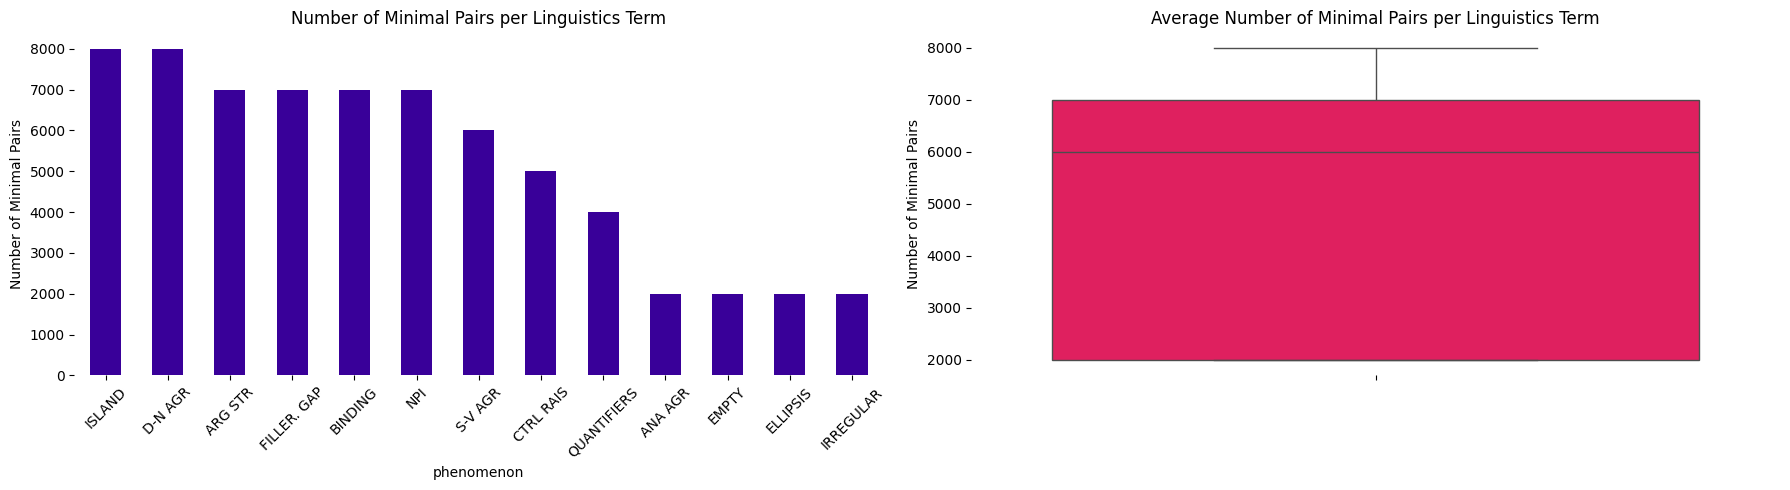

In [9]:
# Calculate the number of minimal pairs per linguistic term
pairs_per_term = blimp_df['phenomenon'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 5), facecolor='white')

# Bar plot
pairs_per_term.plot(kind='bar', ax=axes[0], color='#390099ff')
axes[0].set_title('Number of Minimal Pairs per Linguistics Term')
axes[0].set_ylabel('Number of Minimal Pairs')
axes[0].tick_params(axis='x', rotation=45)
# Box plot with outliers
sns.boxplot(y=pairs_per_term, ax=axes[1], color='#ff0054ff')
axes[1].set_title('Average Number of Minimal Pairs per Linguistics Term')
axes[1].set_ylabel('Number of Minimal Pairs')

# visual tweaks
for ax in axes:
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

### Analysing Sentences

#### Average length and extremes

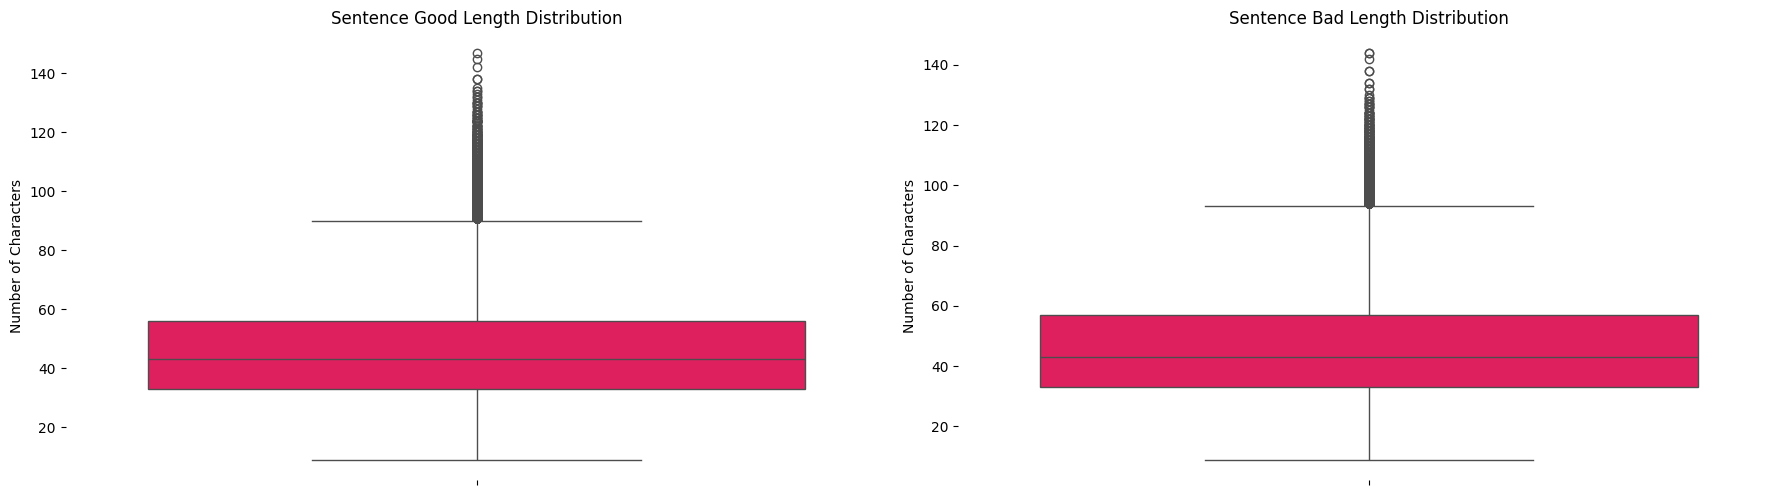

Average length of 'sentence_good': 46 characters
Average length of 'sentence_bad': 46 characters


In [10]:
# Calculate the length of each sentence in characters
blimp_df['sentence_good_length'] = blimp_df['sentence_good'].apply(len)
blimp_df['sentence_bad_length'] = blimp_df['sentence_bad'].apply(len)

# Calculate average lengths
avg_good_length = blimp_df['sentence_good_length'].mean()
avg_bad_length = blimp_df['sentence_bad_length'].mean()

# Plot boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5), facecolor='white')

# Boxplot for sentence_good_length
sns.boxplot(data=blimp_df['sentence_good_length'], ax=axes[0], color='#ff0054ff')
axes[0].set_title('Sentence Good Length Distribution')
axes[0].set_ylabel('Number of Characters')

# Boxplot for sentence_bad_length
sns.boxplot(data=blimp_df['sentence_bad_length'], ax=axes[1], color='#ff0054ff')
axes[1].set_title('Sentence Bad Length Distribution')
axes[1].set_ylabel('Number of Characters')

# Visual tweaks
for ax in axes:
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()
print(f"Average length of 'sentence_good': {int(avg_good_length)} characters")
print(f"Average length of 'sentence_bad': {int(avg_bad_length)} characters")

In [11]:
# Display the longest and shortest good sentences
print("Longest sentences (good):")
for idx, row in blimp_df.nlargest(3, 'sentence_good_length')[['pair_id', 'paradigm', 'sentence_good', 'sentence_good_length']].iterrows():
    print(f"{row['sentence_good']}\n(Length: {row['sentence_good_length']} characters, Pair ID: {row['pair_id']}, Paradigm: {row['paradigm']})\n")

print("\nShortest sentences (good):")
for idx, row in blimp_df.nsmallest(3, 'sentence_good_length')[['pair_id', 'paradigm', 'sentence_good', 'sentence_good_length']].iterrows():
    print(f"{row['sentence_good']}\n(Length: {row['sentence_good_length']} characters, Pair ID: {row['pair_id']}, Paradigm: {row['paradigm']})\n")


Longest sentences (good):
A brother of that waitress considered there to be more than three daughters of every waitress motivating Derek's handyman to tour this high school.
(Length: 147 characters, Pair ID: 138, Paradigm: existential_there_object_raising)

All libraries do declare it to be not so obvious that many children imagine a lot of dancers would ask Ruth's electricians to ascend these hills.
(Length: 145 characters, Pair ID: 389, Paradigm: expletive_it_object_raising)

Every doctor's nephews shouldn't complain about several contractors and Cindy's ex-husband shouldn't complain about a few exposed contractors.
(Length: 142 characters, Pair ID: 962, Paradigm: ellipsis_n_bar_2)


Shortest sentences (good):
Eric saw.
(Length: 9 characters, Pair ID: 117, Paradigm: drop_argument)

Mark won.
(Length: 9 characters, Pair ID: 814, Paradigm: intransitive)

Adam ate.
(Length: 9 characters, Pair ID: 76, Paradigm: irregular_past_participle_verbs)



#### Sentence length by phenomenon

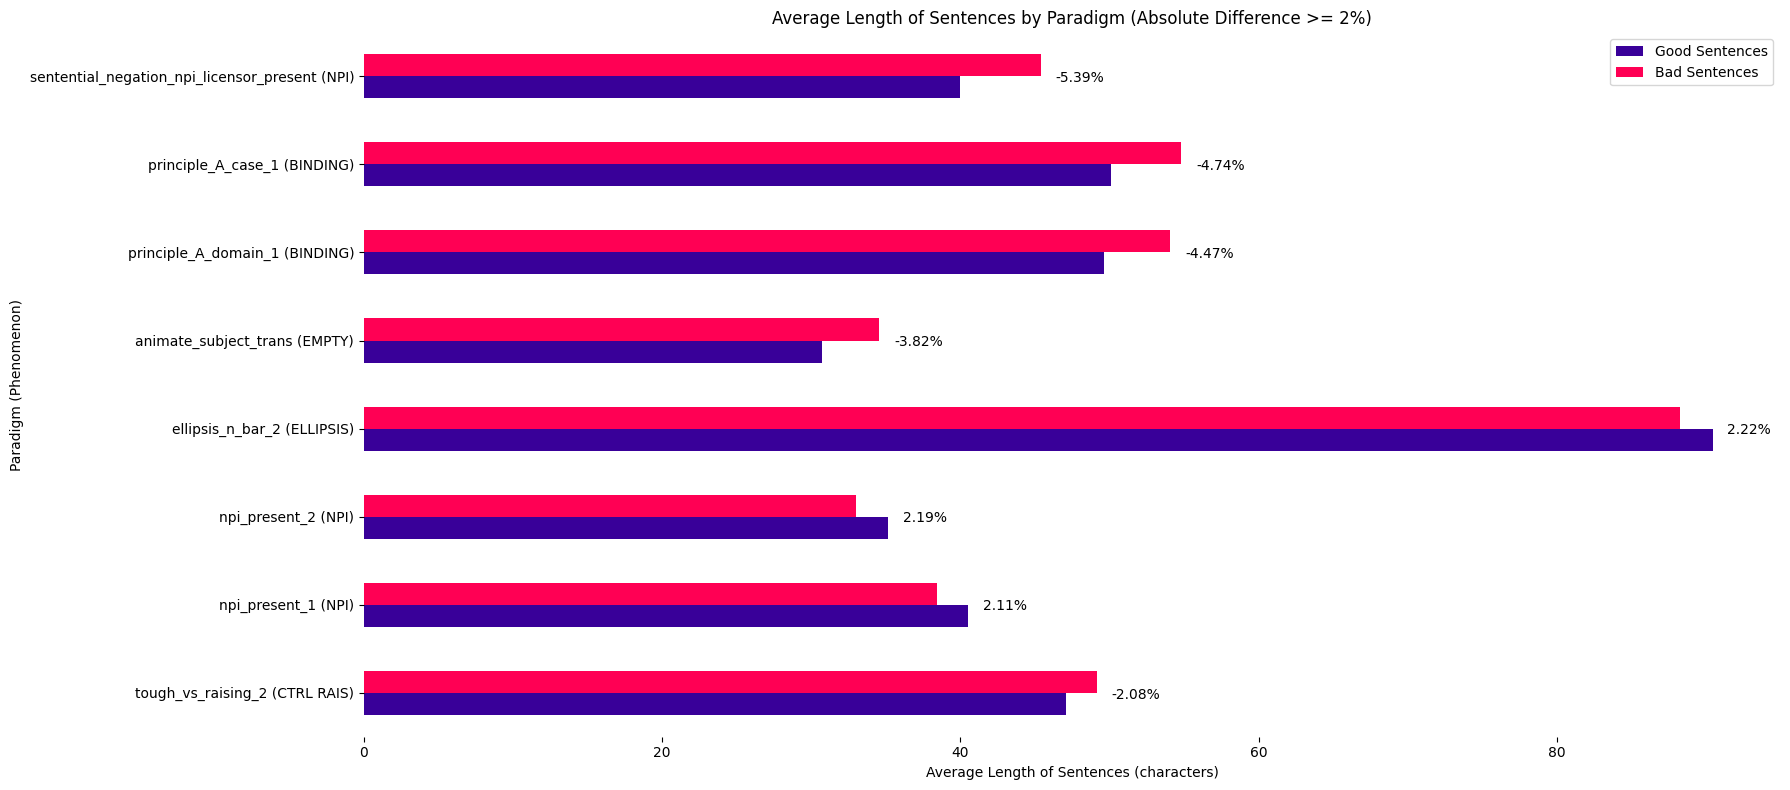

In [12]:
# Group by paradigm and calculate the average length of sentence_good and sentence_bad
avg_length_by_paradigm = blimp_df.groupby(['paradigm', 'phenomenon'])[['sentence_good_length', 'sentence_bad_length']].mean()

# Calculate the difference in length
avg_length_by_paradigm['difference'] = avg_length_by_paradigm['sentence_good_length'] - avg_length_by_paradigm['sentence_bad_length']

# Filter the paradigms where the absolute difference is 2% or more
filtered_avg_length_by_paradigm = avg_length_by_paradigm[avg_length_by_paradigm['difference'].abs() >= 2]

# Sort by the absolute difference in length
filtered_avg_length_by_paradigm = filtered_avg_length_by_paradigm.reindex(filtered_avg_length_by_paradigm['difference'].abs().sort_values(ascending=True).index)

# Plot the average length of sentence_good and sentence_bad by paradigm
fig, ax = plt.subplots(facecolor='white', figsize=(18, 8))
filtered_avg_length_by_paradigm[['sentence_good_length', 'sentence_bad_length']].plot(kind='barh', ax=ax, color={'sentence_good_length': '#390099ff', 'sentence_bad_length': '#ff0054ff'}, legend=False)
ax.set_title('Average Length of Sentences by Paradigm (Absolute Difference >= 2%)')
ax.set_xlabel('Average Length of Sentences (characters)')
ax.set_ylabel('Paradigm (Phenomenon)')

# Set custom y-tick labels
ax.set_yticklabels([f"{paradigm} ({phenomenon})" for paradigm, phenomenon in filtered_avg_length_by_paradigm.index])

# Annotate bars with absolute difference
for i, (index, row) in enumerate(filtered_avg_length_by_paradigm.iterrows()):
    ax.text(max(row['sentence_good_length'], row['sentence_bad_length']) + 1, i - 0.1, f"{row['difference']:.2f}%", color='black', ha='left', va='bottom')

# Set custom legend
ax.legend(['Good Sentences', 'Bad Sentences'])

# Visual tweaks
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


In [13]:
# Group by paradigm and count the number of duplicate sentences
duplicate_counts_per_paradigm = blimp_df.groupby('paradigm').apply(lambda x: x.duplicated(['sentence_good', 'sentence_bad'], keep=False).sum()).reset_index(name='duplicate_count')

# Display the count of duplicates per paradigm
duplicate_counts_per_paradigm.head()

/tmp/ipykernel_33242/1218491313.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_counts_per_paradigm = blimp_df.groupby('paradigm').apply(lambda x: x.duplicated(['sentence_good', 'sentence_bad'], keep=False).sum()).reset_index(name='duplicate_count')


,paradigm,duplicate_count
0,adjunct_island,0
1,anaphor_gender_agreement,0
2,anaphor_number_agreement,0
3,animate_subject_passive,0
4,animate_subject_trans,0


In [14]:
# Find duplicate good sentences
duplicate_good_sentences = blimp_df[blimp_df.duplicated(subset=['sentence_good'], keep=False)]

# Group by the good sentences and display the corresponding bad sentences and paradigms
grouped_duplicates = duplicate_good_sentences.groupby('sentence_good')

# Display only 5 examples of good sentence duplicates with their corresponding bad sentences and paradigms
for i, (sentence_good, group) in enumerate(grouped_duplicates):
    if i >= 5:
        break
    print(f"Good Sentence: {sentence_good}")
    for idx, row in group.iterrows():
        print(f"  Bad Sentence: {row['sentence_bad']} (Paradigm: {row['paradigm']})")
    print()


Good Sentence: A jacket shrank.
  Bad Sentence: A jacket cleaned. (Paradigm: inchoative)
  Bad Sentence: A jacket shrunk. (Paradigm: irregular_past_participle_verbs)

Good Sentence: Every scarf shrank.
  Bad Sentence: Every scarf bought. (Paradigm: inchoative)
  Bad Sentence: Every scarf shrunk. (Paradigm: irregular_past_participle_verbs)

Good Sentence: Lissa thought about herself.
  Bad Sentence: Lissa thought about himself. (Paradigm: anaphor_gender_agreement)
  Bad Sentence: Lissa thought about themselves. (Paradigm: anaphor_number_agreement)

Good Sentence: Many gloves shrank.
  Bad Sentence: Many gloves looked like. (Paradigm: inchoative)
  Bad Sentence: Many gloves shrunk. (Paradigm: irregular_past_participle_verbs)

Good Sentence: Martha shocked herself.
  Bad Sentence: Martha shocked itself. (Paradigm: anaphor_gender_agreement)
  Bad Sentence: Martha shocked themselves. (Paradigm: anaphor_number_agreement)



In [15]:
# Filter the dataframe for good and bad sentences that start with "Only"
only_good_sentences = blimp_df[blimp_df['sentence_good'].str.startswith('Only')]
only_bad_sentences = blimp_df[blimp_df['sentence_bad'].str.startswith('Only')]

# Display the number of such sentences
num_only_good_sentences = len(only_good_sentences)
num_only_bad_sentences = len(only_bad_sentences)

print(f"Number of good sentences that start with 'Only': {num_only_good_sentences}")
print(f"Number of bad sentences that start with 'Only': {num_only_bad_sentences}")

Number of good sentences that start with 'Only': 2000
Number of bad sentences that start with 'Only': 0


## Analyse word frequency using Google Ngrams

In [ ]:
import requests
from collections import defaultdict

def get_ngram_frequency(word, corpus='eng_2019'):
    """
    Query the Google Ngrams dataset to get the frequency of a word.
    """
    url = f'https://books.google.com/ngrams/json?content={word}&year_start=1800&year_end=2019&corpus={corpus}&smoothing=3'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data:
            return data[0]['timeseries']
    return []

def calculate_average_ngram_frequency(sentences):
    """
    Calculate the average ngram frequency for each word in the given sentences.
    """
    word_frequencies = defaultdict(list)
    for sentence in sentences:
        words = sentence.split()
        for word in words:
            if word not in word_frequencies:
                word_frequencies[word] = get_ngram_frequency(word)
    
    avg_frequencies = []
    for sentence in sentences:
        words = sentence.split()
        total_frequency = 0
        count = 0
        for word in words:
            if word in word_frequencies and word_frequencies[word]:
                total_frequency += sum(word_frequencies[word]) / len(word_frequencies[word])
                count += 1
        avg_frequencies.append(total_frequency / count if count > 0 else 0)
    
    return avg_frequencies

# Take a sample of 50 sentence pairs
sample_size = 50
sample_df = blimp_df.sample(n=sample_size, random_state=42)

# Extract good and bad sentences
good_sentences = sample_df['sentence_good'].tolist()
bad_sentences = sample_df['sentence_bad'].tolist()

# Calculate average ngram frequencies for good and bad sentences
good_avg_frequencies = calculate_average_ngram_frequency(good_sentences)
bad_avg_frequencies = calculate_average_ngram_frequency(bad_sentences)

# Plot the ngram frequency of good and bad sentences next to each other
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
index = range(sample_size)
bar_width = 0.35

bar1 = plt.bar(index, good_avg_frequencies, bar_width, label='Good Sentences', color='#390099ff')
bar2 = plt.bar([i + bar_width for i in index], bad_avg_frequencies, bar_width, label='Bad Sentences', color='#ff0054ff')

plt.xlabel('Sentence Pair Index')
plt.ylabel('Average Ngram Frequency')
plt.title('Average Ngram Frequency of Good and Bad Sentences')
plt.xticks([i + bar_width / 2 for i in index], index)
plt.legend()

plt.tight_layout()
plt.show()